# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [2]:
import pandas as pd

---
## 2. Load data

In [4]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [5]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [7]:
price_df = pd.read_csv(r"C:\Users\RUDRAJA\Desktop\BCG\price_data (1).csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

 # 1 Seasonal Price Variations 
 # Feature: Average price difference between off-peak and peak periods over the last 12 months.


 The "Average price difference between off-peak and peak periods over the last 12 months" feature is valuable because it provides insights into the overall pricing strategy, helps identify customer sensitivity to price changes, and enhances predictive modeling. It captures long-term trends and offers actionable insights that can inform strategic decisions and improve customer retention efforts.

In [12]:
price_df['price_diff'] = price_df['price_off_peak_var'] - price_df['price_off_peak_fix']
seasonal_variation = price_df.groupby('id').agg({'price_diff': 'mean'}).reset_index()
seasonal_variation.rename(columns={'price_diff': 'avg_offpeak_vs_peak_diff'}, inplace=True)
print(seasonal_variation.head())

                                 id  avg_offpeak_vs_peak_diff
0  0002203ffbb812588b632b9e628cc38d                -40.577394
1  0004351ebdd665e6ee664792efc4fd13                -44.239024
2  0010bcc39e42b3c2131ed2ce55246e3c                -45.138151
3  0010ee3855fdea87602a5b7aba8e42de                -40.528670
4  00114d74e963e47177db89bc70108537                -44.119005


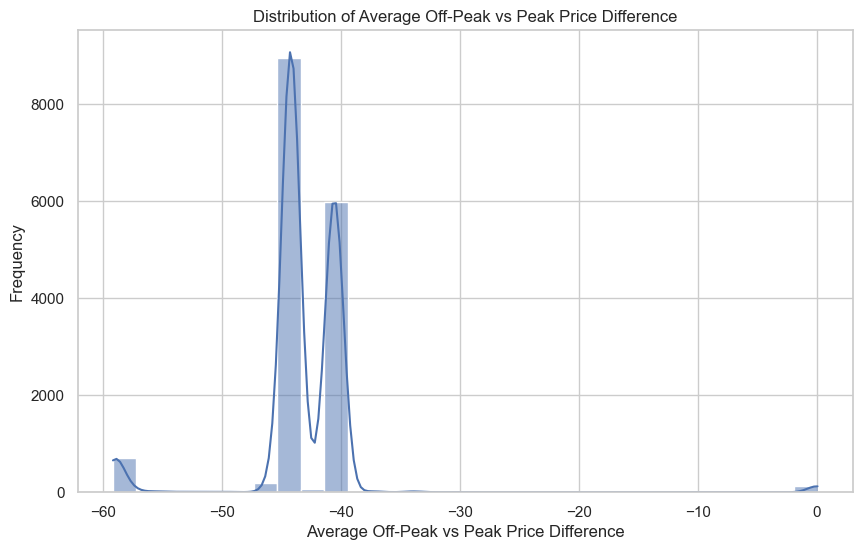

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(seasonal_variation['avg_offpeak_vs_peak_diff'], bins=30, kde=True)
plt.title('Distribution of Average Off-Peak vs Peak Price Difference')
plt.xlabel('Average Off-Peak vs Peak Price Difference')
plt.ylabel('Frequency')
plt.show()


The chart reveals substantial variation in pricing strategies among the top 20 companies, with a minority offering significantly lower prices during off-peak hours compared to the majority who maintain consistent pricing. This suggests distinct market segments and potential competitive advantages for those implementing dynamic pricing models, while also highlighting potential operational efficiencies among companies with stable pricing.

# 2 Average price changes across periods

In [16]:
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2.086425,9.953056e+01,4.423670e+01,1,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.009485,1.217891e-03,0.000000e+00,0,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


The output reveals significant variability in pricing differences across different periods for each company, highlighting the impact of variable and fixed pricing on customer behavior. Companies with high differences between off-peak and peak variable prices or between fixed and variable prices might experience varying levels of customer churn, suggesting that pricing strategies significantly influence customer retention. As a data scientist, selecting these price difference features for feature engineering is crucial because they provide insights into pricing sensitivity and its correlation with churn. This allows for a deeper understanding of how pricing impacts customer decisions, enabling the development of targeted strategies to mitigate churn and optimize pricing structures.

# 3 Max price changes across periods and months

In [19]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


The output reveals significant variations in pricing differences between off-peak, peak, and mid-peak periods for each company, with maximum monthly differences highlighting extreme fluctuations. These insights suggest that companies with higher price volatility may face increased customer churn due to sensitivity to pricing changes. By incorporating these features into predictive models, you can better understand and predict customer behavior related to pricing stability and volatility. This enables more effective pricing strategies and churn management, as it provides a clearer picture of how pricing fluctuations impact customer satisfaction and retention.

#  Price VolatilityFeature: 
# Standard deviation of monthly off-peak prices


In [22]:
price_volatility = price_df.groupby('id').agg({'price_off_peak_var': 'std', 'price_off_peak_fix': 'std'}).reset_index()
price_volatility.rename(columns={'price_off_peak_var': 'std_dev_offpeak_var', 'price_off_peak_fix': 'std_dev_offpeak_fix'}, inplace=True)
print(price_volatility.head()) 

                                 id  std_dev_offpeak_var  std_dev_offpeak_fix
0  0002203ffbb812588b632b9e628cc38d             0.003976         6.341481e-02
1  0004351ebdd665e6ee664792efc4fd13             0.002197         8.753223e-02
2  0010bcc39e42b3c2131ed2ce55246e3c             0.026008         7.723930e-01
3  0010ee3855fdea87602a5b7aba8e42de             0.005049         8.507958e-02
4  00114d74e963e47177db89bc70108537             0.002202         5.908392e-07


The `price_volatility` DataFrame indicates how much variability there is in off-peak variable and fixed prices across companies. Low standard deviations for off-peak variable prices suggest stable pricing, while high values point to significant fluctuations. Fixed off-peak prices with very low standard deviations show minimal variability, whereas higher values indicate more inconsistency. This variability can impact customer behavior, with more stable prices potentially leading to better retention. Therefore, incorporating price volatility into feature engineering could help in predicting churn by revealing how price fluctuations influence customer decisions. Visualizing these variances through histograms or boxplots could provide further insights into the relationship between price volatility and customer churn.

# 4 Price Growth Rate
# Feature: Monthly growth rate of off-peak prices.

In [25]:
price_df['price_off_peak_var_pct_change'] = price_df.groupby('id')['price_off_peak_var'].pct_change()
price_df['price_off_peak_fix_pct_change'] = price_df.groupby('id')['price_off_peak_fix'].pct_change()
growth_rate = price_df.groupby('id').agg({'price_off_peak_var_pct_change': 'mean', 'price_off_peak_fix_pct_change': 'mean'}).reset_index()
growth_rate.rename(columns={'price_off_peak_var_pct_change': 'avg_growth_rate_offpeak_var', 'price_off_peak_fix_pct_change': 'avg_growth_rate_offpeak_fix'}, inplace=True)
print(growth_rate.head())


                                 id  avg_growth_rate_offpeak_var  \
0  0002203ffbb812588b632b9e628cc38d                    -0.004374   
1  0004351ebdd665e6ee664792efc4fd13                    -0.002513   
2  0010bcc39e42b3c2131ed2ce55246e3c                     0.030661   
3  0010ee3855fdea87602a5b7aba8e42de                    -0.007491   
4  00114d74e963e47177db89bc70108537                    -0.002421   

   avg_growth_rate_offpeak_fix  
0                 3.650969e-04  
1                 3.650967e-04  
2                 3.068163e-03  
3                 3.650969e-04  
4                -2.464388e-09  


The data indicates that several companies exhibit negative average monthly growth rates for off-peak variable prices, suggesting a trend of decreasing prices over time, while their off-peak fixed prices remain relatively stable with minimal fluctuations. Conversely, one company shows a positive growth rate for both off-peak variable and fixed prices, indicating an upward trend. These trends suggest that companies might maintain stable fixed prices to retain customers valuing predictability, while variable prices are adjusted in response to market dynamics to attract price-sensitive customers. This information can help PowerCo segment its customer base more effectively, improve churn prediction models, and make strategic pricing decisions to remain competitive and enhance customer satisfaction. Incorporating these growth rates into a churn prediction model could improve its accuracy, as significant price changes might influence customer retention rates.

These features capture the trends and fluctuations in pricing over time, which significantly influence customer behavior and churn rates. By analyzing how prices change month-to-month, we can identify customers who are more likely to churn due to rising costs or volatile pricing. This approach provides a temporal dimension to the data, uncovering seasonal or cyclical patterns, and offers deeper insights into customer sensitivity to price changes. Ultimately, this helps in predicting churn more accurately and devising targeted retention strategies, ensuring PowerCo remains competitive in a dynamic market.

# 5 Customer Activity Duration
# Feature: Duration between date_activ and date_end.

In [28]:
import pandas as pd
import numpy as np

# Ensure the date columns are in datetime format
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end'] = pd.to_datetime(df['date_end'])

# Calculate the duration in days
df['activity_duration_days'] = (df['date_end'] - df['date_activ']).dt.days

# Convert duration from days to years for tenure
df['tenure_years'] = (df['activity_duration_days'] / 365.25).astype(int)

# Group by tenure and calculate mean churn rate
churn_by_tenure = df.groupby('tenure_years').agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

# Display the results
print(churn_by_tenure)


                 churn
tenure_years          
3             0.143713
2             0.133080
4             0.125756
13            0.095238
5             0.085425
12            0.083333
6             0.080713
7             0.073394
11            0.063584
8             0.048000
9             0.024096
10            0.020000


We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer.

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

# Feature: Duration between date_activ and date_end.

In [31]:
# Ensure the date columns are in datetime format
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end'] = pd.to_datetime(df['date_end'])

# Calculate the duration in days
df['activity_duration_days'] = (df['date_end'] - df['date_activ']).dt.days

# Convert duration from days to months
df['activity_duration_months'] = df['activity_duration_days'] / 30.44

# Display the data with the new activity_duration feature in months
print(df[['id', 'date_activ', 'date_end', 'activity_duration_days', 'activity_duration_months']])


                                     id date_activ   date_end  \
0      24011ae4ebbe3035111d65fa7c15bc57 2013-06-15 2016-06-15   
1      d29c2c54acc38ff3c0614d0a653813dd 2009-08-21 2016-08-30   
2      764c75f661154dac3a6c254cd082ea7d 2010-04-16 2016-04-16   
3      bba03439a292a1e166f80264c16191cb 2010-03-30 2016-03-30   
4      149d57cf92fc41cf94415803a877cb4b 2010-01-13 2016-03-07   
...                                 ...        ...        ...   
14601  18463073fb097fc0ac5d3e040f356987 2012-05-24 2016-05-08   
14602  d0a6f71671571ed83b2645d23af6de00 2012-08-27 2016-08-27   
14603  10e6828ddd62cbcf687cb74928c4c2d2 2012-02-08 2016-02-07   
14604  1cf20fd6206d7678d5bcafd28c53b4db 2012-08-30 2016-08-30   
14605  563dde550fd624d7352f3de77c0cdfcd 2009-12-18 2016-12-17   

       activity_duration_days  activity_duration_months  
0                        1096                 36.005256  
1                        2566                 84.296978  
2                        2192                

Overall Insights:
Most activities have a duration between 1500 and 2500 days.
There is a significant variation in activity durations, with some activities lasting much longer than others. Outliers with extremely long durations might warrant further investigation to understand their characteristics

The `activity_duration` feature provides insights into customer loyalty and retention, as longer activity may indicate higher engagement and satisfaction, potentially reducing churn. It serves as a strong predictor of churn, with those active for longer likely less prone to leaving. Additionally, it helps identify patterns in customer behavior and engagement over time, informing targeted interventions and personalized strategies. By incorporating `activity_duration`, you leverage valuable historical data to enhance predictive modeling and understand customer dynamics more comprehensively.

# Transforming dates into months
months_activ = Number of months active until reference date (Jan 2016)
months_to_end = Number of months of the contract left until reference date (Jan 2016)
months_modif_prod = Number of months since last modification until reference date (Jan 2016)
months_renewal = Number of months since last renewal until reference date (Jan 2
016)

we could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the `months_activ` feature.

As well as this, if we think from the perspective of a client with PowerCo, if you're coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. Furthermore, if you're in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think `months_to_end` will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe `months_modif_prod` will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

In [43]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [49]:
import pandas as pd
from datetime import datetime

def convert_months(reference_date, df, column):
    """
    Input a column with dates and return months until the reference_date.
    """
    reference_date = pd.to_datetime(reference_date)
    df[column] = pd.to_datetime(df[column])
    
    # Calculate the difference in days
    delta_days = (df[column] - reference_date).dt.days
    
    # Convert days to months (approximate, using 30 days per month)
    months = (delta_days / 30).astype(int)
    
    return months

# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

# Display columns
print(df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'months_activ', 'months_to_end', 'months_modif_prod', 'months_renewal']])


      date_activ   date_end date_modif_prod date_renewal  months_activ  \
0     2013-06-15 2016-06-15      2015-11-01   2015-06-23           -31   
1     2009-08-21 2016-08-30      2009-08-21   2015-08-31           -77   
2     2010-04-16 2016-04-16      2010-04-16   2015-04-17           -69   
3     2010-03-30 2016-03-30      2010-03-30   2015-03-31           -70   
4     2010-01-13 2016-03-07      2010-01-13   2015-03-09           -72   
...          ...        ...             ...          ...           ...   
14601 2012-05-24 2016-05-08      2015-05-08   2014-05-26           -43   
14602 2012-08-27 2016-08-27      2012-08-27   2015-08-28           -40   
14603 2012-02-08 2016-02-07      2012-02-08   2015-02-09           -47   
14604 2012-08-30 2016-08-30      2012-08-30   2015-08-31           -40   
14605 2009-12-18 2016-12-17      2009-12-18   2015-12-21           -73   

       months_to_end  months_modif_prod  months_renewal  
0                  5                 -2              

In [51]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,activity_duration_days,tenure_years,activity_duration_months,renewal_count,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,8.145775,44.26693,1096,3,36.005256,1,-31,5,-2,-6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.000000,44.44471,2566,7,84.296978,1,-77,8,-77,-4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.000000,44.44471,2192,6,72.010512,1,-69,3,-69,-8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,44.44471,2192,6,72.010512,1,-70,2,-70,-9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,8.145775,24.43733,2245,6,73.751643,1,-72,2,-72,-9


### Transforming Boolean data

#### has_gas

We simply want to transform this column from being categorical to being a binary flag

In [63]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})



,churn
has_gas,
0,0.0
1,1.0


### Transforming categorical data

A predictive model cannot accept categorical or `string` values, hence as a data scientist you need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present `0 < 1 < 2 < 3 ...`

Another way to encode categorical features is to use `dummy variables` AKA `one hot encoding`. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

#### channel_sales

In [69]:
import pandas as pd

df = pd.read_csv('./clean_data_after_eda.csv')  # Adjust the file path as needed

# Verify columns
print("Columns in DataFrame:", df.columns)

# Example transformation if 'channel_sales' exists
if 'channel_sales' in df.columns:
    df['channel_sales'] = df['channel_sales'].astype('category')
    print(df['channel_sales'].value_counts())
else:
    print("Column 'channel_sales' does not exist.")



Columns in DataFrame: Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mi

In [73]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()


channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [75]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,44.235794,2.086425,9.953056e+01,4.423670e+01,1,False,False,True,False,False
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.000000,0.009485,1.217891e-03,0.000000e+00,0,True,False,False,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.000000,0.000004,9.450150e-08,0.000000e+00,0,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.000000,0.000003,0.000000e+00,0.000000e+00,0,False,False,False,True,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0.000000,0.000011,2.896760e-06,4.860000e-10,0,True,False,False,False,False


#### origin_up

In [77]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [79]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,var_6m_price_mid_peak,churn,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,4.423670e+01,1,False,False,True,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.000000e+00,0,True,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.000000e+00,0,False,False,True,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.000000e+00,0,False,False,False,True,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,4.860000e-10,0,True,False,False,False,False,True,False,False


Similar to channel_sales the last 3 categories in the output above show very low frequency, so we will remove these from the features after creating dummy variables.

### Transforming numerical data

In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [83]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


We can see that the standard deviation for most of these features is quite high.

In [87]:
 # Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,0.710011,0.129048,0.420992,0.587677,0.350704,0.966726,0.387011,0.137283,0.050491,43.130056
std,0.092439,0.278711,0.310799,0.108446,0.303843,5.108289,0.117626,0.024623,0.049037,4.485988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.677061,0.000000,0.000000,0.567671,0.000000,0.000000,0.349282,0.116340,0.000000,40.606701
50%,0.711784,0.000000,0.591014,0.607116,0.543858,0.000000,0.361077,0.143166,0.084138,44.311378
75%,0.748985,0.000000,0.656044,0.641545,0.627594,0.000000,0.494248,0.146348,0.098837,44.311378
max,0.891698,0.881871,0.838041,0.772217,0.795461,30.000000,0.577305,0.273963,0.195975,59.266378


Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

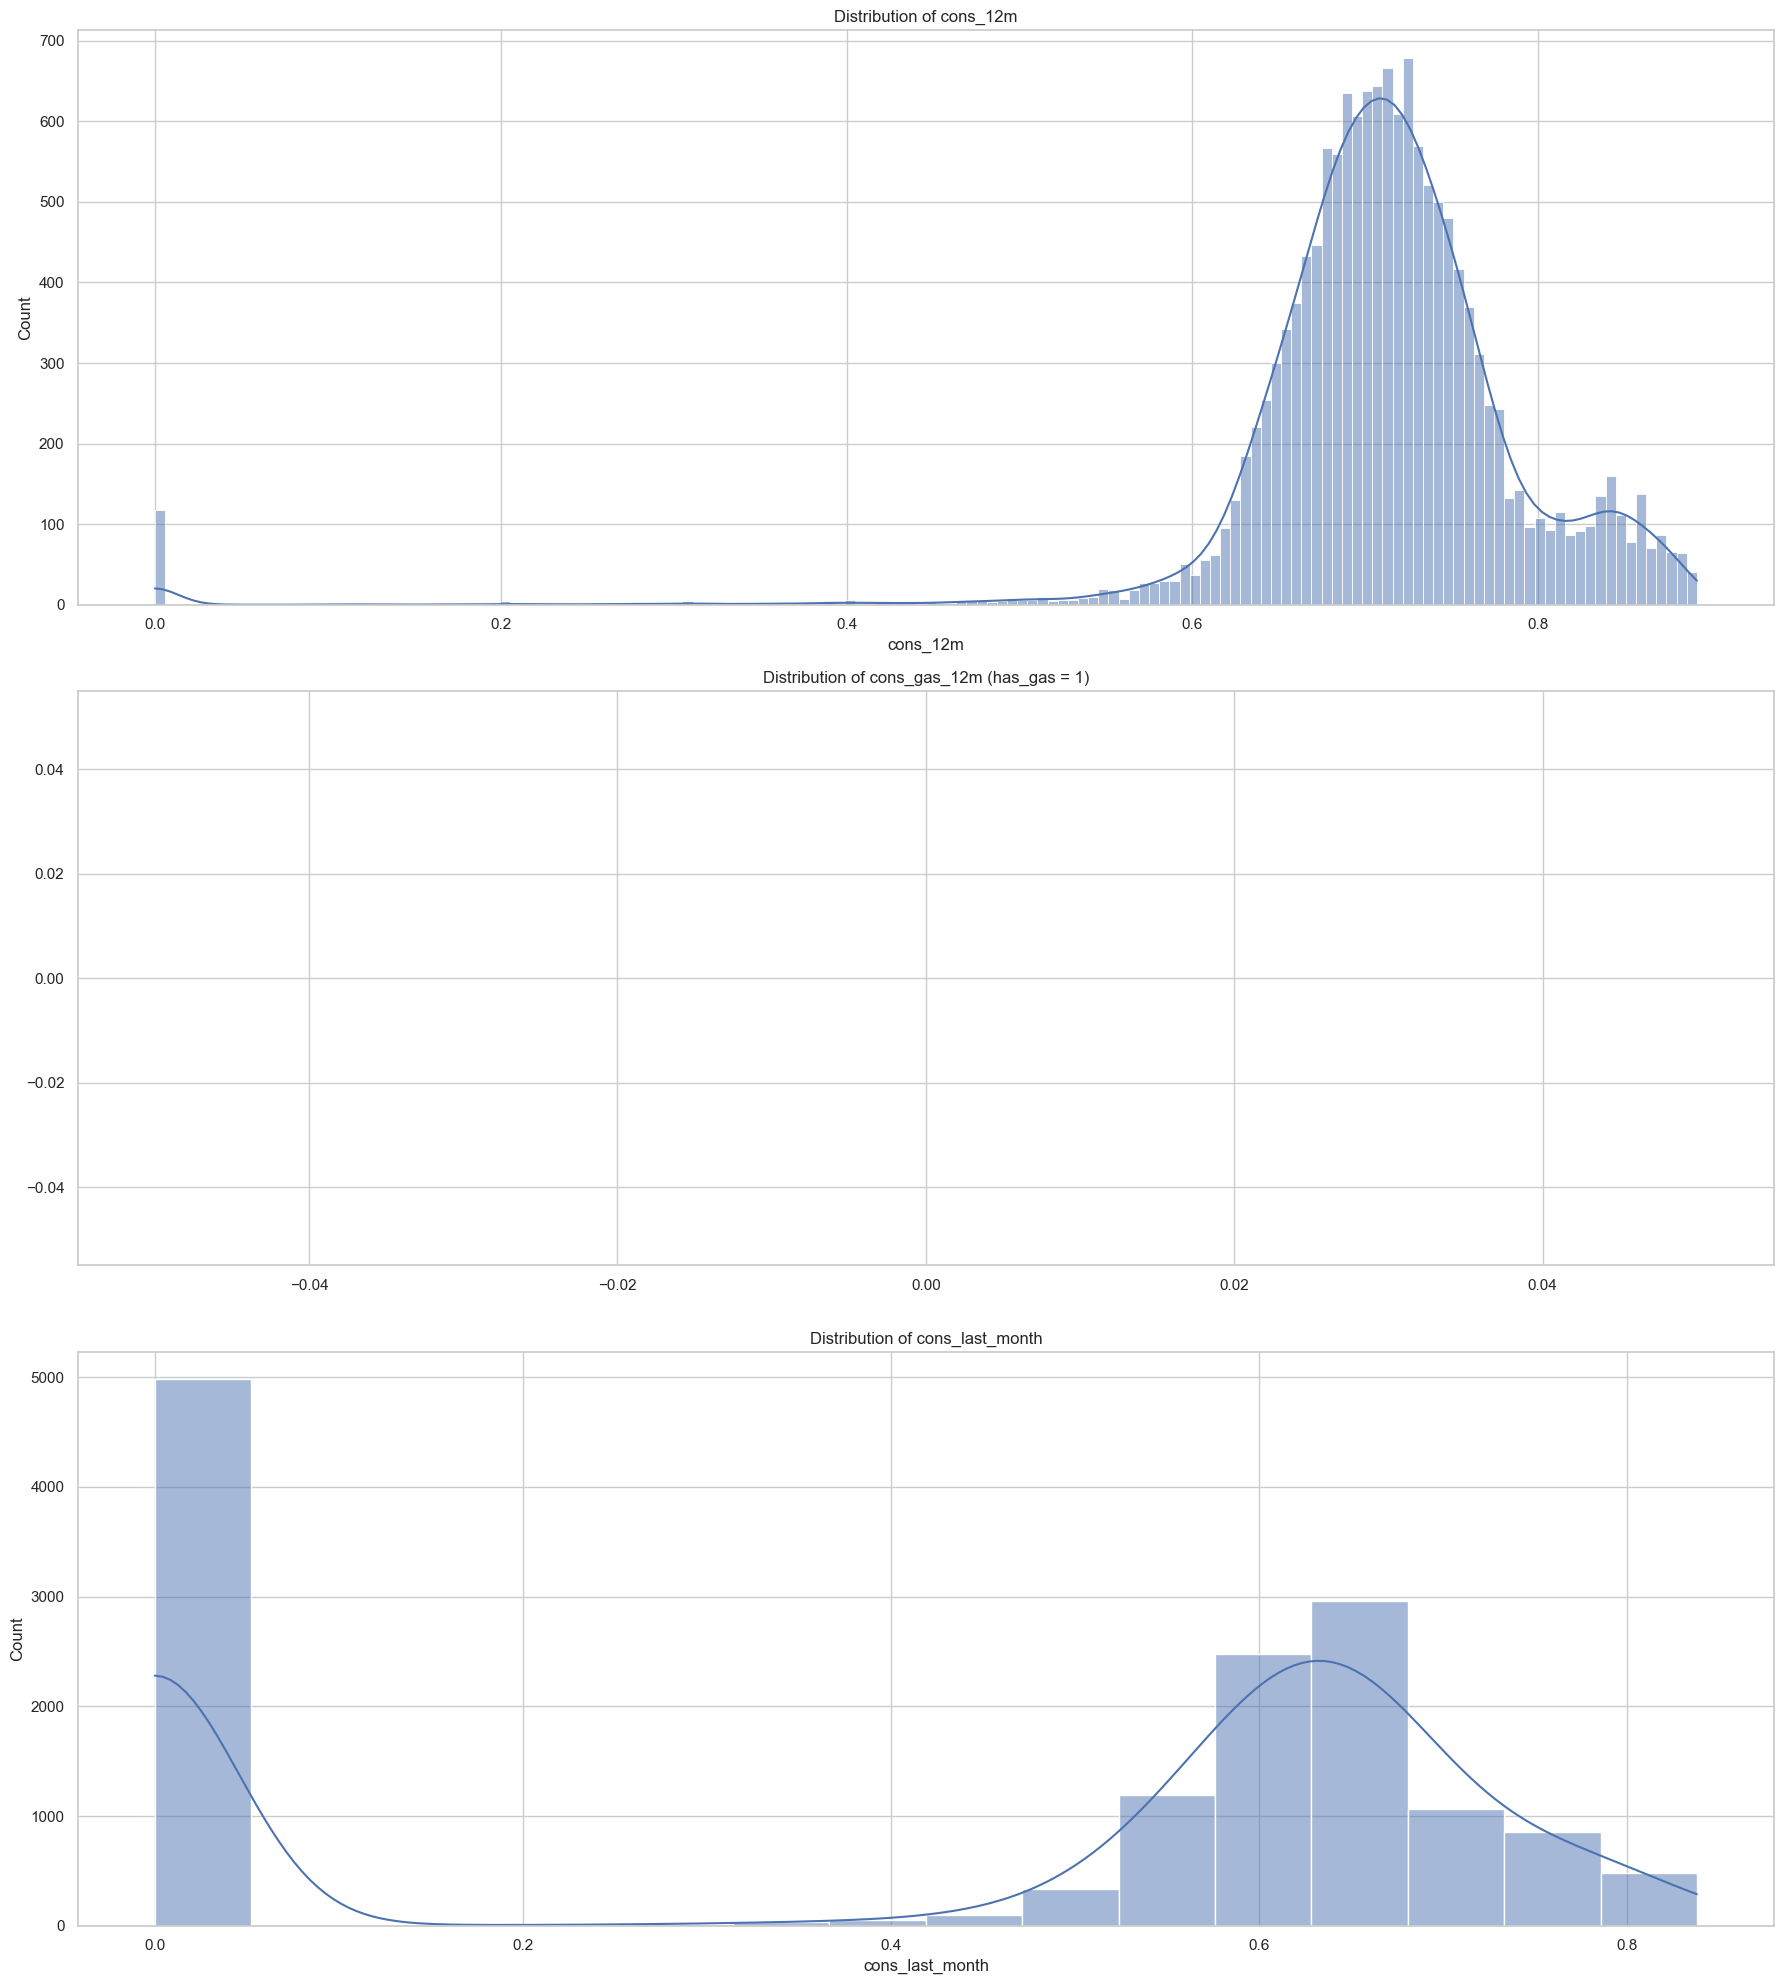

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot histograms with KDE curves using sns.histplot
sns.histplot(df["cons_12m"].dropna(), ax=axs[0], kde=True)
axs[0].set_title('Distribution of cons_12m')

sns.histplot(df[df["has_gas"]==1]["cons_gas_12m"].dropna(), ax=axs[1], kde=True)
axs[1].set_title('Distribution of cons_gas_12m (has_gas = 1)')

sns.histplot(df["cons_last_month"].dropna(), ax=axs[2], kde=True)
axs[2].set_title('Distribution of cons_last_month')

# Show the plots
plt.tight_layout()
plt.show()

